<span style="color:gray;">Chris Williams | Jan 25, 2017 </span>
# Quantum Mechanics Review

Applying the Hamiltonian Operator on a given wavefuntion, $\Psi$ results in the Schrodinger Equation,

$$ i\hbar  {\frac {\partial }{\partial t}}\Psi (\mathbf {r} ,t)={\hat {H}}\Psi (\mathbf {r} ,t) $$

for which solutions (to the time-independent Schrodinger eqn) exist for certan 'eigenenergies'. To visualize these eigenenergies and their corresponding eigenfunctions for a quantum harmonic oscillator, we must first discretize the matrix Hamiltonian operator using a fintite-difference approximation.

### Construct parabolic potential

To start, import required libraries and define the requred constants used to define potential energy of the system.

In [2]:
%matplotlib notebook

from ipywidgets import *

import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
import numpy as np
import plotly.plotly as py

hbar = 1.05e-14      #reduced planks constant in units of Å^2*kg/s
hbarSI = 1.055e-34   #"---------------------" in units of m^2*kg/s
m = 1.6266e-27       #mass of particle in units of kg
eV = 1.602e-19       #1 electron volt in units of J

#Define QHO potential parameters
omega = 5.6339e14
eta = 2
x_0=np.sqrt(hbar/(m*omega))

#Determine size of infinite square well of length 2a
a = 4*x_0 # units of Å

# of finite difference steps
N = 1500

# define positions
x = np.linspace(-a,a,N)

#Define the potential

#preallocalte matrix w/0s
V = np.zeros((N,1))

#create potential
V = 0.5*omega**2*m*np.power(abs(x),eta)

### Discretize matrix representation of 1D Hamiltonian
In matrix form, the discretized Hamiltonian can be written in the form

$$
{\mathbf  {\hat{H}}}={\frac  {\hbar ^{2}}{2m}}{\frac  {d^{2}}{dx^{2}}}+U(x)={\begin{pmatrix}\ldots &-t&0&0&0\\-t&V_{{-1}}+2t&-t&0&0\\0&-t&V_{0}+2t&-t&0\\0&0&-t&V_{1}+2t&-t\\0&0&0&-t&\ldots \\\end{pmatrix}}
$$

using a finite difference method, where $V(x)$ is the potential energy of the system and $t\equiv {\frac  {\hbar ^{2}}{2ma^{2}}}$

In [3]:
U = np.zeros((N,N))
dx2 = np.power(2*a/N,2)

#Create tridiagonal basis for Hamiltonian (TODO: use diag insead?)
for i in range(0,N):
    U[i,i]= -2
    if i > 0:
        U[i, i-1] = 1
    if i < N-1:
        U[i,i+1] = 1

#Compute Hamiltonian
H = -(hbar**2/(2*m))*U/dx2 + np.diag(V)

#Find eigenvalues and eigenfunctions
E,v = np.linalg.eig(H)



### Visualizing a time-dependent Gaussian wavepacket

Using the solutions to the eigenvalue problem presented by the Schrodinger equation we can create a wavepacket in the center of the potential by weighting the eigenfunctions with a Gaussian distribution and re-introducing the time-dependent term.

In [36]:
mu = 0.5
sig = 0.05

def normalize(vec):
    return vec/np.linalg.norm(vec)

psi = mlab.normpdf(np.linspace(0,1,N),mu,sig)
psi = normalize(psi)

#Project Gaussian onto eigenfunction
wavePacket = psi.dot(v)

steps = 20
t = np.linspace(0,.52e-34,steps)

timePacket = np.zeros((steps,N))

for i in range(steps):
    timeDep = np.exp(-1j*E*t[i]/hbarSI)
    #introduce time dependency, project new amplitudes onto eigenfunctions
    b1 = np.diag(wavePacket*np.real(timeDep))
    c1 = normalize(np.sum(v.dot(b1),axis=1).T)
    timePacket[i,:] = np.conj(c1)*c1 #square wavefuntion to obtain probabilities

#Plot time evolution of probability densities
def pltProb(i):
    fig, ax1 = plt.subplots()
    plt.title('Probability Distribution of Wavepacket Through Time')
    plt.xlabel('x [Å]')
    plt.ylabel('$\mathregular{|\Psi|^2}$')
    ax2 = ax1.twinx()
    ax1.plot(x,np.real(timePacket[i-1,:].T))
    #Overlay parabolic potential
    ax2.plot(x,V,'g--')
    ax2.legend('V(x)', loc='best')
    ax1.set_ylim([0,0.01])
    ax2.yaxis.set_visible(False)
    plt.show
    
    
#def updatePlot(i):
#    pltProb(x,np.real(timePacket[i-1,:].T))

Finally, enable interactivty using ipywidgets.
Use the slider to adjust timesteps between $t_0=0$ and $t_{f}=0.5\times 10^{-34}$

<IPython.core.display.Javascript object>


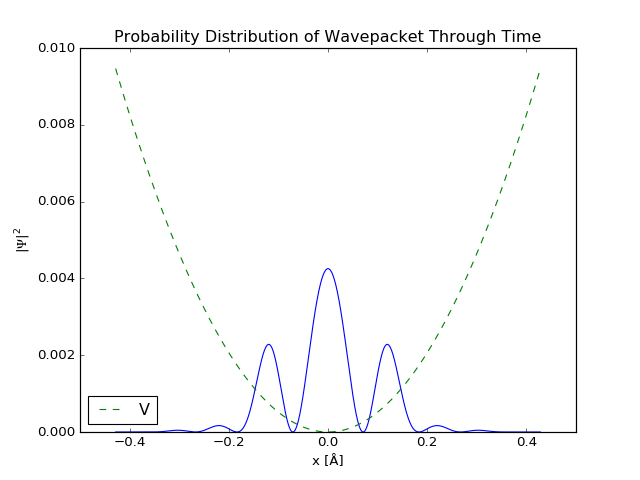

In [37]:
interact(pltProb,i=IntSlider(min = 1,max = steps, value = 1))

As expected, the wavefunction oscillates (with a period on the order of 10e-34 seconds) while remaining centered in the harmonic potential. Because the wavefunction remains centered, the expectation of the position and momentum of the particle will be zero.

---
### References
1. [Discretization of 1D Hamiltonian](https://wiki.physics.udel.edu/phys824/Discretization_of_1D_Hamiltonian)
2. [Schrodinger Equation](https://www.wikiwand.com/en/Schr%C3%B6dinger_equation)
3. [Eigenvalues and Eigenfunctions](http://hyperphysics.phy-astr.gsu.edu/hbase/quantum/eigen.html)


<span style="color:gray;">Modelled after projects assigned in the the University of Waterloo Nanotechnology Engineering Program Quantum Mechanics course (NE 232 - Instructor: David Corey). Created as an introduction to using  Python/Jupyter notebooks</span>


